In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['number_of_reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['number_of_reviews'].max()
Min = Mexico['number_of_reviews'].min()
Limites = [Min, Max]
Limites

[0.0, 271.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

271.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

17.272554072444922

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 271, 16)
intervalos

array([  0.        ,  18.06666667,  36.13333333,  54.2       ,
        72.26666667,  90.33333333, 108.4       , 126.46666667,
       144.53333333, 162.6       , 180.66666667, 198.73333333,
       216.8       , 234.86666667, 252.93333333, 271.        ])

In [12]:
# Creamos las categorías
categorias = [
    "Sin reseñas",
    "Reseñas muy pocas",
    "Pocas reseñas",
    "Reseñas limitadas",
    "Reseñas iniciales",
    "Reseñas moderadas",
    "Reseñas regulares",
    "Reseñas en crecimiento",
    "Reseñas considerables",
    "Reseñas buenas",
    "Reseñas muy buenas",
    "Reseñas sobresalientes",
    "Reseñas excepcionales",
    "Reseñas destacadas",
    "Reseñas máximas"
]

In [13]:
# Creamos las ctegorias en la columna numerica
Mexico['number_of_reviews'] = pd.cut ( x = Mexico ['number_of_reviews'], bins = intervalos, labels = categorias )
Mexico['number_of_reviews']

0                           NaN
1             Reseñas limitadas
2                 Pocas reseñas
3        Reseñas en crecimiento
4                   Sin reseñas
                  ...          
26577                       NaN
26578                       NaN
26579                       NaN
26580                       NaN
26581                       NaN
Name: number_of_reviews, Length: 26582, dtype: category
Categories (15, object): ['Sin reseñas' < 'Reseñas muy pocas' < 'Pocas reseñas' < 'Reseñas limitadas' ... 'Reseñas sobresalientes' < 'Reseñas excepcionales' < 'Reseñas destacadas' < 'Reseñas máximas']

In [14]:
table1 = freq_tbl(Mexico['number_of_reviews'])
table1

,number_of_reviews,frequency,percentage,cumulative_perc
0,Sin reseñas,10259,0.385938,0.447483
1,Reseñas muy pocas,3598,0.135355,0.604423
2,Pocas reseñas,2841,0.106877,0.728343
3,Reseñas limitadas,1609,0.060530,0.798526
4,Reseñas iniciales,1129,0.042472,0.847771
5,Reseñas moderadas,851,0.032014,0.884891
6,Reseñas regulares,626,0.023550,0.912196
7,Reseñas en crecimiento,521,0.019600,0.934921
8,Reseñas considerables,400,0.015048,0.952368
9,Reseñas buenas,299,0.011248,0.965410


In [15]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,number_of_reviews,frequency
0,Sin reseñas,10259
1,Reseñas muy pocas,3598
2,Pocas reseñas,2841
3,Reseñas limitadas,1609
4,Reseñas iniciales,1129
5,Reseñas moderadas,851
6,Reseñas regulares,626
7,Reseñas en crecimiento,521
8,Reseñas considerables,400
9,Reseñas buenas,299


In [16]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('number_of_reviews')
Filtro_index

,frequency
number_of_reviews,
Sin reseñas,10259
Reseñas muy pocas,3598
Pocas reseñas,2841
Reseñas limitadas,1609
Reseñas iniciales,1129
Reseñas moderadas,851
Reseñas regulares,626
Reseñas en crecimiento,521
Reseñas considerables,400


Text(0, 0.5, 'Frecuencia')

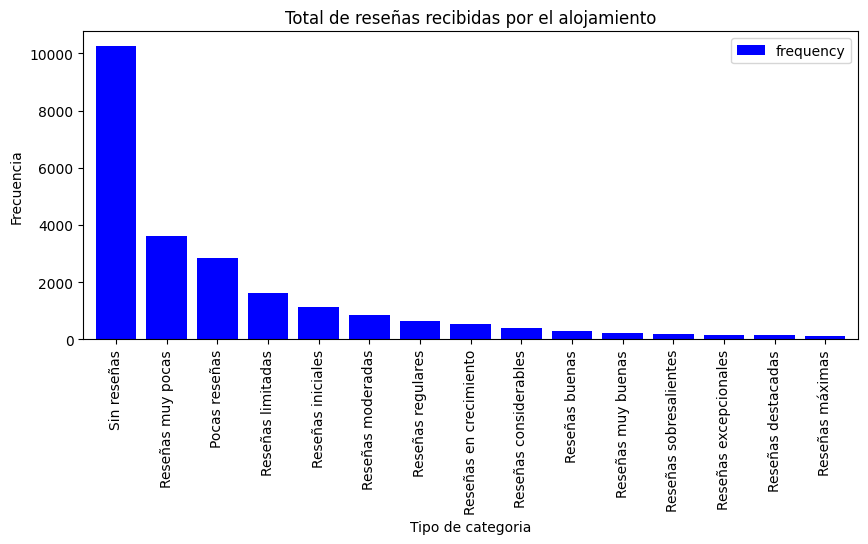

In [17]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Total de reseñas recibidas por el alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')